# The Nanos ML Task

### Firstly, i set up an environment where i installed all my dependencies so as not to be difficult if i am going to push to git or someone else trying to use the code will not be seeing a lot of unnecessary requirements.

In [96]:
%load_ext autoreload
%autoreload 2

In [132]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sb

from scipy import stats
from scipy.stats import pearsonr

from numpy import absolute, std, mean, linspace

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV



from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Re-arranging the dataset for tidyness, i ensure to have imported all the needed libraries before starting up so that they can be in one place to ease readability.

# 1. Read the file and display columns

In [53]:
df = pd.read_csv("MLTask/cruise_ship_info.csv")

In [54]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


Checking for missing values

In [148]:
df.isna().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

# 2. Calculate some basic statistics from this data(count, mean, std, etc).

In [55]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


<AxesSubplot:>

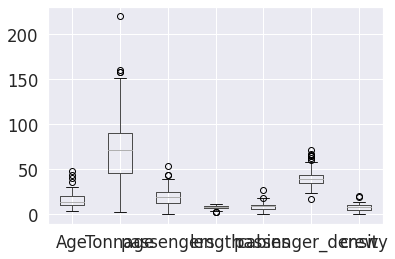

In [56]:
df.boxplot()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tonnage'}>,
        <AxesSubplot:title={'center':'passengers'}>],
       [<AxesSubplot:title={'center':'length'}>,
        <AxesSubplot:title={'center':'cabins'}>,
        <AxesSubplot:title={'center':'passenger_density'}>],
       [<AxesSubplot:title={'center':'crew'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

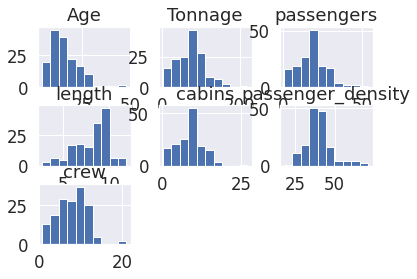

In [57]:
df.hist()

From the dataset, it is obvious the dataset is not properly scaled, some features has high dimension while some features with very small dimension. Some has their maximum as 220 while another 11.8.
There are sizeable outliers with the Tonnage attribute and few others
passenger_density, passenger seem to have a even normal distribution.

# 3. Selecting Important Columns and dropping off those not important

There are several ways of going about this task, it is normally called Feature Engineering, which involved Feature Selection, Feature Extraction and Dimentionality reduction. PCA is a popular method used for dimensionality reduction but here we wil check out the correlation through a scatter plot.


checking Age's correlation against Crew size

In [58]:
crew = df['crew']
Age = df['Age']

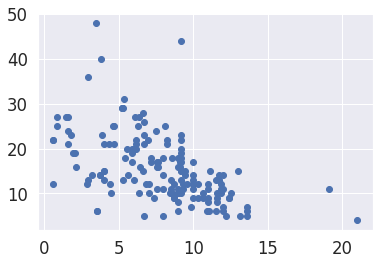

In [59]:
plt.scatter(crew, Age)
plt.show()

checking Ship_name's correlation against Crew size

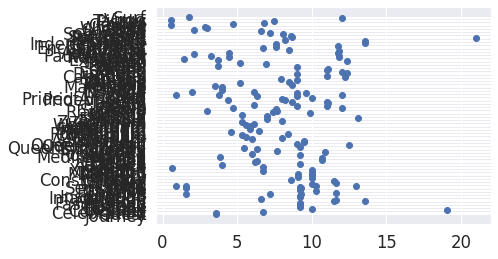

In [60]:
crew = df['crew']
name = df['Ship_name']
plt.scatter(crew, name)
plt.show()

checking Cruise_line's correlation against Crew size

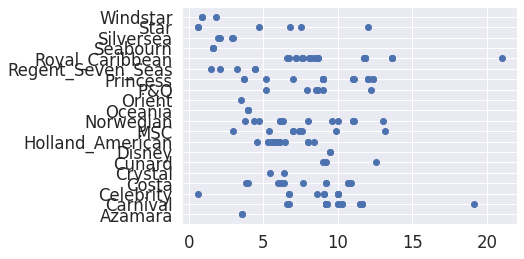

In [61]:
crew = df['crew']
c_line = df['Cruise_line']
plt.scatter(crew, c_line)
plt.show()

checking Tonnage's correlation against Crew size

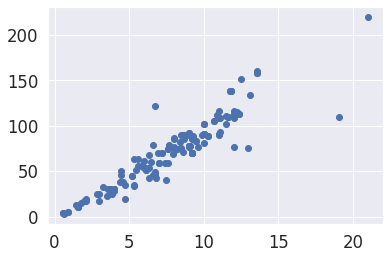

In [62]:
crew = df['crew']
ton = df['Tonnage']
plt.scatter(crew, ton)
plt.show()

checking passenger's correlation against Crew size

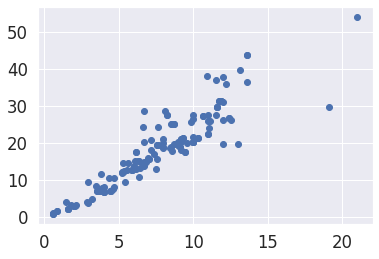

In [63]:
crew = df['crew']
psg = df['passengers']
plt.scatter(crew, psg)
plt.show()

checking length's correlation against Crew size

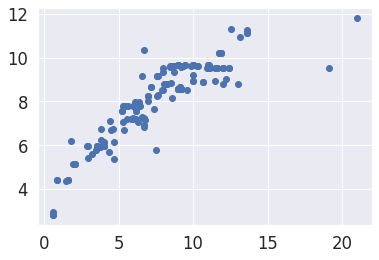

In [64]:
crew = df['crew']
length= df['length']
plt.scatter(crew, length)
plt.show()

checking cabin's correlation against Crew size

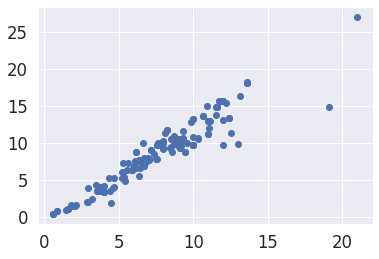

In [65]:
crew = df['crew']
cab = df['cabins']
plt.scatter(crew, cab)
plt.show()

checking pasenger_density's correlation against Crew size

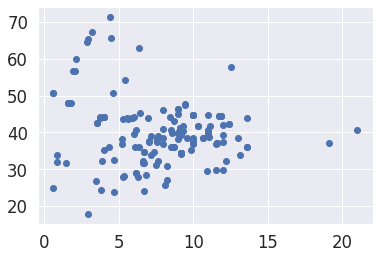

In [66]:
crew = df['crew']
pas_den = df['passenger_density']
plt.scatter(crew, pas_den)
plt.show()

It is clear and obvious that some features are not in anyway correlated with the size of the Crew, features like Ships_name, Cruise_line, Passenger_density.
However, we can not be so sure and we must use some other means of re-affirming our claim by plotting a correlation table among all the variable in the dataset.

In [67]:
data = pd.DataFrame(df,
columns=['crew','cabins','length','passengers','Tonnage','Age','Cruise_line','Ship_name','passenger_density'])
corrMatrix = data.corr()
print (corrMatrix)

                       crew    cabins    length  passengers   Tonnage  \
crew               1.000000  0.950823  0.895857    0.915234  0.927569   
cabins             0.950823  1.000000  0.889798    0.976341  0.948764   
length             0.895857  0.889798  1.000000    0.883535  0.922368   
passengers         0.915234  0.976341  0.883535    1.000000  0.945061   
Tonnage            0.927569  0.948764  0.922368    0.945061  1.000000   
Age               -0.530657 -0.510019 -0.532286   -0.515542 -0.606646   
passenger_density -0.155509 -0.253181 -0.090488   -0.294867 -0.040846   

                        Age  passenger_density  
crew              -0.530657          -0.155509  
cabins            -0.510019          -0.253181  
length            -0.532286          -0.090488  
passengers        -0.515542          -0.294867  
Tonnage           -0.606646          -0.040846  
Age                1.000000          -0.278830  
passenger_density -0.278830           1.000000  


On showing the table, it is glaring that Age and passenger_density have negative correlation with the Crew size, therefore I decided to remove them, I didnt remove Ship_name and Cruise_line yet because of the OneHotEncoding we are going to perform  on them as they were categorical in nature. Therefore I decided to remove Age and Passenger_density first.

In [68]:
df_new = df.drop(['Age','passenger_density'], axis = 1)

In [69]:
df_new

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,crew
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00
...,...,...,...,...,...,...,...
153,Taurus,Star,3.341,0.66,2.79,0.33,0.59
154,Virgo,Star,76.800,19.60,8.79,9.67,12.00
155,Spirit,Windstar,5.350,1.58,4.40,0.74,0.88
156,Star,Windstar,5.350,1.67,4.40,0.74,0.88


I decided to check the distribution of the features remaining in the dataframe so as to know how to go about their scaling.

/home/wizardcalidad/Desktop/Nano/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


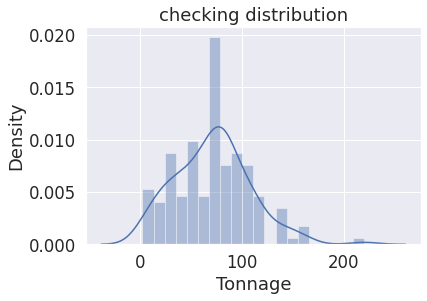

In [70]:
sb.distplot(df_new['Tonnage'],bins=20)
plt.title('checking distribution')
plt.show()

/home/wizardcalidad/Desktop/Nano/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


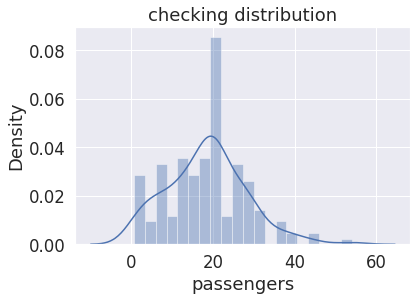

In [71]:
sb.distplot(df_new['passengers'],bins=20)
plt.title('checking distribution')
plt.show()

/home/wizardcalidad/Desktop/Nano/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


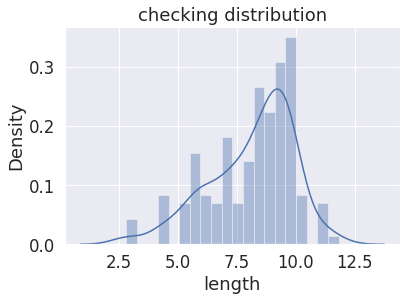

In [72]:
sb.distplot(df_new['length'],bins=20)
plt.title('checking distribution')
plt.show()

/home/wizardcalidad/Desktop/Nano/env/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


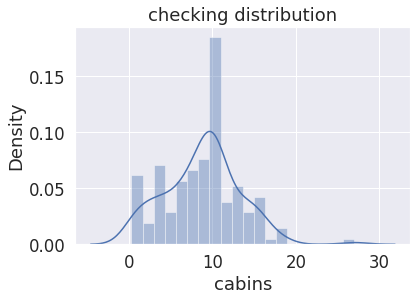

In [73]:
sb.distplot(df_new['cabins'],bins=20)
plt.title('checking distribution')
plt.show()

<AxesSubplot:xlabel='cabins', ylabel='Density'>

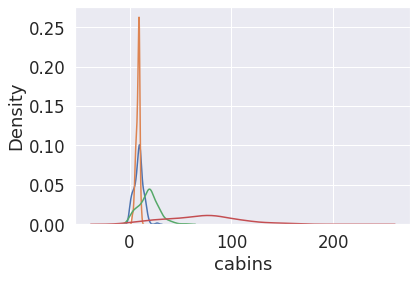

In [74]:
sb.kdeplot(df_new['cabins'])
sb.kdeplot(df_new['length'])
sb.kdeplot(df_new['passengers'])
sb.kdeplot(df_new['Tonnage'])

I realized the distribution is somehow of high dimension and plotting the features together we can see the outliers and how far apart the dimension is. Therefore, it needed to be scaled, initially i tried out MinMaxScaler and discovered it cant handle outliers efficiently so i had to go for StandardScaler with work with it perfectly.

In [75]:
df_new.head(5)

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,crew
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00


To apply the standardscaler, I have to drop the Categorical variable, i am just following the Zen of python which says:
Flat is better than nested and readability counts.

So, the covariance_matrix would be plot to further solidify our trust in the features we have decided to use i predicting the crew size.

In [76]:
df_to_split = df_new.drop(['Ship_name', 'Cruise_line'], axis=1)

In [77]:
df_to_split.head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [145]:
sc = StandardScaler()
scaled = sc.fit_transform(df_to_split.iloc[:,range(0,5)].values)
cvr_matrix = np.cov(scaled.T)

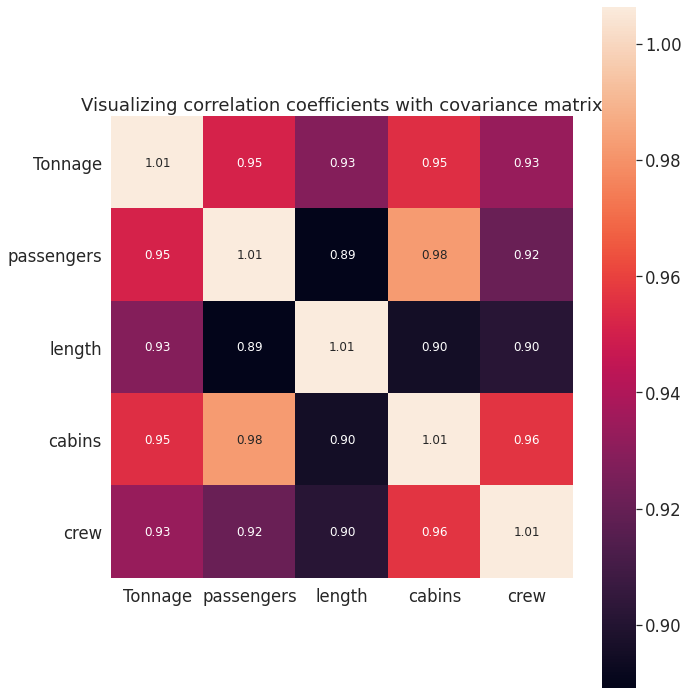

In [146]:
plt.figure(figsize=(10,10))
sb.set(font_scale=1.5)
hm = sb.heatmap(cvr_matrix,
                 cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
                 yticklabels=df_to_split.columns,
                 xticklabels=df_to_split.columns)
plt.title('Visualizing correlation coefficients with covariance matrix')
plt.tight_layout()
plt.show()

In [147]:
df_to_split.corr()

,Tonnage,passengers,length,cabins,crew
Tonnage,1.000000,0.945061,0.922368,0.948764,0.927569
passengers,0.945061,1.000000,0.883535,0.976341,0.915234
length,0.922368,0.883535,1.000000,0.889798,0.895857
cabins,0.948764,0.976341,0.889798,1.000000,0.950823
crew,0.927569,0.915234,0.895857,0.950823,1.000000


In [80]:
X = df_to_split.iloc[:,0:4].values
y = df_to_split['crew']. values

In [81]:
X.shape

(158, 4)

In [82]:
y.shape

(158,)

# 4. Use OneHotEncoding for the Categorical features which are the Ship_name abd Cruise_line

In [83]:
df_new.head()

,Ship_name,Cruise_line,Tonnage,passengers,length,cabins,crew
0,Journey,Azamara,30.277,6.94,5.94,3.55,3.55
1,Quest,Azamara,30.277,6.94,5.94,3.55,3.55
2,Celebration,Carnival,47.262,14.86,7.22,7.43,6.70
3,Conquest,Carnival,110.000,29.74,9.53,14.88,19.10
4,Destiny,Carnival,101.353,26.42,8.92,13.21,10.00


In [84]:
encoder = OneHotEncoder(sparse=False)
onehot = encoder.fit_transform(data)
pd.get_dummies(df_new[['Ship_name', 'Cruise_line', 'Tonnage', 'passengers', 'length', 'cabins', 'crew']])

,Tonnage,passengers,length,cabins,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,Ship_name_Aries,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30.277,6.94,5.94,3.55,3.55,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47.262,14.86,7.22,7.43,6.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.000,29.74,9.53,14.88,19.10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,101.353,26.42,8.92,13.21,10.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,3.341,0.66,2.79,0.33,0.59,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,76.800,19.60,8.79,9.67,12.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,5.350,1.58,4.40,0.74,0.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,5.350,1.67,4.40,0.74,0.88,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 5. Create training and testing sets.

I try to append classifier to preprocessing pipeline following the instruction ofnusing 60% of the data for training and 40% for test strictly, using train_test_split for the splitting operation.

In [85]:
clf = Pipeline(steps=[('scaler', StandardScaler()),
                      ('classifier', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0)

# 6. Build a machine learning model to predict the crew size

In [158]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.958


In [159]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

Evaluation metrics are ways of knowing how well our model has performed. 
Mean Square Eror: It is the absolute measure of the goodness for the fit. It determines the quality of the predictor.
r2_score:It is used to determine how well the model fits the dependent variables.

The model score is about the accuracy of our model, how well has it been predicting.

In [160]:
print('The mean square error for train and test dataset are train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))
print('Rsquared value for both train and test dataset are train: %.2f, test: %.2f' % (
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

The mean square error for train and test dataset are train: 1.15, test: 0.43
Rsquared value for both train and test dataset are train: 0.91, test: 0.96


## We can deduce from the result of our model that the model is performing good given that the percentage of predicting the test dataset (crew size) is high at 96.00%, and low mean_square_error rate ar 43.00%

#### Visualizing how close the train and test are when it comes to prediction.

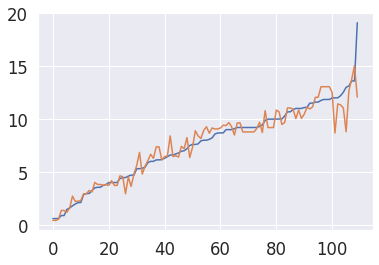

In [163]:
vis_sort = y_train.argsort()
plt.plot(np.arange(y_train.shape[0]), y_train[vis_sort])
plt.plot(np.arange(y_train.shape[0]), y_pred_train[vis_sort])
plt.show()

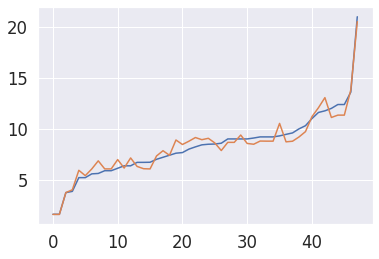

In [165]:
vis_sort = y_test.argsort()
plt.plot(np.arange(y_test.shape[0]), y_test[vis_sort])
plt.plot(np.arange(y_test.shape[0]), y_pred_test[vis_sort])
plt.show()

In [166]:
y_test[vis_sort][:10]

array([1.6 , 1.6 , 3.73, 3.85, 5.2 , 5.2 , 5.57, 5.61, 5.88, 5.88])

In [167]:
y_pred_test[vis_sort][:10]

array([1.58765086, 1.58765086, 3.73157126, 4.00627709, 5.9189211 ,
       5.39474051, 6.05242395, 6.84851561, 6.05745873, 6.05745873])

# 7. Pearson correlation coefficient

The Pearson correlation coefficient can be used to summarize the strength of the linear relationship between two data samples.

The Pearson’s correlation coefficient is calculated as the covariance of the two variables divided by the product of the standard deviation of each data sample. It is the normalization of the covariance between the two variables to give an interpretable score.

In [102]:
pcc = np.corrcoef(X_train, X_test)
print(pcc)

[[1.         0.99742558 0.98289187 ... 0.99997467 0.99840127 0.99804312]
 [0.99742558 1.         0.96936321 ... 0.99775764 0.99944026 0.99985258]
 [0.98289187 0.96936321 1.         ... 0.9815844  0.97622389 0.97023036]
 ...
 [0.99997467 0.99775764 0.9815844  ... 1.         0.99849606 0.99839052]
 [0.99840127 0.99944026 0.97622389 ... 0.99849606 1.         0.99917484]
 [0.99804312 0.99985258 0.97023036 ... 0.99839052 0.99917484 1.        ]]


# Hyperparameter Tuning to Improve Performance of The Model

In [99]:
for i in range(10,100, 10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    clf.fit(X_train, y_train)
    print("model score: %.3f" % clf.score(X_test, y_test))
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    print('The mean square error for train and test dataset are train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))
    print('Rsquared value for both train and test dataset are train: %.2f, test: %.2f' % (
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

model score: 0.921
The mean square error for train and test dataset are train: 0.99, test: 0.85
Rsquared value for both train and test dataset are train: 0.92, test: 0.92
model score: 0.947
The mean square error for train and test dataset are train: 1.25, test: 0.51
Rsquared value for both train and test dataset are train: 0.91, test: 0.95
model score: 0.891
The mean square error for train and test dataset are train: 0.46, test: 1.66
Rsquared value for both train and test dataset are train: 0.95, test: 0.89
model score: 0.898
The mean square error for train and test dataset are train: 0.64, test: 1.37
Rsquared value for both train and test dataset are train: 0.94, test: 0.90
model score: 0.912
The mean square error for train and test dataset are train: 0.74, test: 1.22
Rsquared value for both train and test dataset are train: 0.93, test: 0.91
model score: 0.920
The mean square error for train and test dataset are train: 0.73, test: 1.28
Rsquared value for both train and test dataset ar

The first tuning is the random state, i try to fiddle with it by changing the hyperparameter and the first target is random state which is tuned from 10 to 100 with a step of 10. Obviously, tuning the random state might not improve the performance of the model.

In [100]:
#changing to the very common 70-30  train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)


Here, as part of hyperparameter tuning, I try to tamper with the test_size and change it to 30percent instead of the stated 40percent in the question.

In [101]:
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.958


Obviously, the model performance improved after changing the test size to be 30percent form 92.8percent to 95.8percent

In [41]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [42]:
print('The mean square error for train and test dataset are train: %.2f, test: %.2f' % (
        mean_squared_error(y_train, y_pred_train),
        mean_squared_error(y_test, y_pred_test)))
print('Rsquared value for both train and test dataset are train: %.2f, test: %.2f' % (
        r2_score(y_train, y_pred_train),
        r2_score(y_test, y_pred_test)))

The mean square error for train and test dataset are train: 1.15, test: 0.43
Rsquared value for both train and test dataset are train: 0.91, test: 0.96


# 9. Regularization

Regularisation is a technique in machine learning used in reducing the errors by fitting the function in the proper way on a given training set inorder to avoid overfitting.
The common regularisation techniques are :
 1. Lasso Regularization
 2. Ridge Regularization
 3. DropOut Regularization
 
 The regularization parameter used in this model are Lasso and Ridge which can also be called L1 regularization and L2 regularization respectively.

In [171]:
model = Lasso(alpha=1.0)

model.fit(X_train, y_train)

Lasso()

In [172]:
y_predict = model.predict(X_test)
coeff_used = np.sum(model.coef_!=0)

print('Lasso Regression: R^2 score on training set', model.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', model.score(X_test, y_test)*100)
print("mean_square error", mean_squared_error(y_test, y_predict))
print("R-square value", r2_score(y_test, y_predict))


Lasso Regression: R^2 score on training set 86.79428733298302
Lasso Regression: R^2 score on test set 87.45819602406604
mean_square error 1.262614189200625
R-square value 0.8745819602406604


Using Ridge regularization instead of lasso

In [173]:
ridge = Ridge(alpha = 0.0, normalize = True)
ridge_reg = ridge.fit(X_train, y_train)
y_predict = ridge.predict(X_test)
coeff_used = np.sum(ridge.coef_!=0)

print("R-square value", r2_score(y_test, y_predict))
print("mean_square error", mean_squared_error(y_test, y_predict))
print("number of coefficient used: ", coeff_used)
print(ridge.coef_)

R-square value 0.9576567321103178
mean_square error 0.42628007069178137
number of coefficient used:  4
[ 0.01184189 -0.15209024  0.45454502  0.80765908]


In [174]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.860 (0.266)


In [175]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(ridge, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.630 (0.176)


 Lasso and Ridge regression are being used as our regularization parameter and accuracy score of 86.79 was gotten from the train set while 87.45percent was gotten on the test set on Lasso regression. The r-square value for lasso is 87.45% while r-square value for ridge is 95.7% and obivously ridge performed better than lasso.
### As well, after the cross validation was done with RepeatedKFold, The standard deviation is 0.266 for Lasso and 0.176 for ridge. The closer the standard deviation is to zero the better the model will perform. 
 
Therefore, we can deduce the outright performance of ridge over lasso.

# 10. Regularization parameters value vs. Pearson Correlation

In [128]:
las= []
i = np.linspace(0.1, 1.0, 10)
for i in range(10):
    cll = Lasso(alpha=i)
    cll.fit(X,y)
    las_reg = cll.score(X_train,y_train)
    print(type(las_reg))
    las.append(las_reg)
print(las)

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[0.9113130462127699, 0.8686428208766988, 0.8556506049308372, 0.8550783003661447, 0.8543917817683322, 0.8535910491373996, 0.8526761024733468, 0.8516469417761738, 0.8505035670458807, 0.8492459782824675]


<ipython-input-128-7489959ce1a3>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  cll.fit(X,y)
/home/wizardcalidad/Desktop/Nano/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/wizardcalidad/Desktop/Nano/env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.19362519442656, tolerance: 0.19270836430379745
  model = cd_fast.enet_coordinate_descent(


In [127]:
rig= []
i = np.linspace(0.1, 1.0, 10)
for i in range(10):
    cll = Ridge(alpha=i)
    cll.fit(X,y)
    las_reg = cll.score(X_train,y_train)
    print(type(las_reg))
    rig.append(las_reg)
print(rig)

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[0.9113130462127699, 0.9112798288391701, 0.9112417091915561, 0.9111989814544714, 0.9111519224904121, 0.9111007929906746, 0.9110458385381476, 0.9109872905897853, 0.9109253673857225, 0.9108602747913103]


In [54]:
Pearson = np.corrcoef(X_train,X_test)
print(Pearson)

[[1.         0.99742558 0.98289187 ... 0.99997467 0.99840127 0.99804312]
 [0.99742558 1.         0.96936321 ... 0.99775764 0.99944026 0.99985258]
 [0.98289187 0.96936321 1.         ... 0.9815844  0.97622389 0.97023036]
 ...
 [0.99997467 0.99775764 0.9815844  ... 1.         0.99849606 0.99839052]
 [0.99840127 0.99944026 0.97622389 ... 0.99849606 1.         0.99917484]
 [0.99804312 0.99985258 0.97023036 ... 0.99839052 0.99917484 1.        ]]


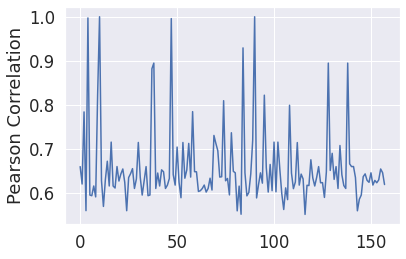

In [55]:
plt.plot(Pearson[:,10])
plt.ylabel('Pearson Correlation')
plt.show()

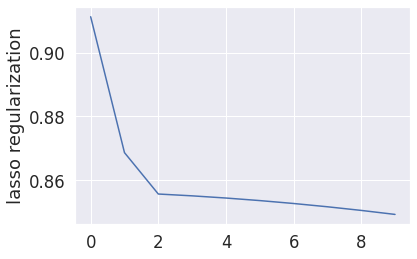

In [56]:
plt.plot(las)
plt.ylabel('lasso regularization')
plt.show()

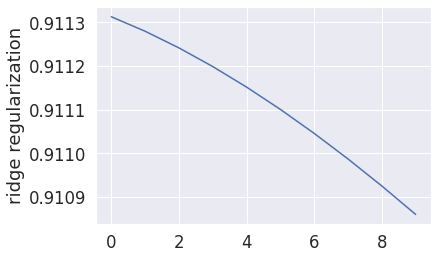

In [177]:
plt.plot(rig)
plt.ylabel('ridge regularization')
plt.show()